In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import econtools as econ
import econtools.metrics as mt
import math

In [51]:
df, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/df.sav")

In [68]:
##### linear combination ###### - works well
var_neg = np.var(df['negativejudg'])
var_comp = np.var(df['competition'])
var_learn = np.var(df['learning'])
var_bp = np.var(df['betterperson'])

df['comb_perf'] = (var_neg*df['negativejudg'] + var_comp*df['competition']) / (var_neg + var_comp)
df['comb_mastery'] =(var_learn*df['learning'] + var_bp*df['betterperson']) / (var_learn + var_bp)
df['comb_perfshare']= df['comb_perf']/ (df['comb_mastery']+df['comb_perf'])
df['comb_masteryshare'] = 1-df['comb_perfshare']

In [69]:

df_youth, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/12차년도(2015) DATA/중학교 3학년 코호트/f11_m_youth.sav")

In [70]:
# employed and earning values
df_youth = df_youth[(df_youth["F11Y05034"]>0) & (df_youth["F11Y05002"] == 1)]
df_youth = df_youth.rename(columns = {"F11Y05034": "income_st"})
df_youth = df_youth[["BYSID", "income_st"]]

In [71]:
income_list = df_youth["BYSID"].to_list()
df3 = df[df["year"]==2003]
df4 = df[df["year"]==2004]

In [72]:
df3 = pd.merge(df3,df_youth)
df4 = pd.merge(df4,df_youth)

In [73]:
df.loc[df['BYSID'].isin(income_list) == True, 'comb_perfshare']

4       0.503149
7       0.405132
8       0.365742
10      0.447594
12      0.535595
          ...   
3837    0.447594
3838    0.365742
3839    0.503149
3841    0.365742
3842    0.334130
Name: comb_perfshare, Length: 1650, dtype: float64

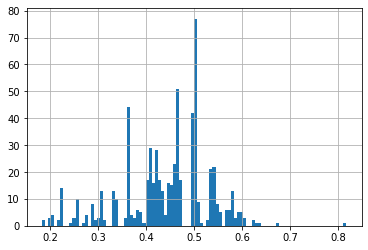

In [74]:
df3['comb_perfshare'].hist(bins = 100)

In [75]:
#############################################
#완전 박제: 음수가 나왔어ㅠㅠㅠcomb_perfshare
############################################
y = df3['income_st']
x = df3['comb_perfshare']

exog = ['comb_perfshare', 'comb_masteryshare','income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df3, 'comb_perf', exog))
print(np.corrcoef(x,y))

y = df3['income_st']
x = df3['comb_perf']

exog = ['comb_perf','income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df3, 'comb_perf', exog))
print(np.corrcoef(x,y))

Dependent variable:	comb_perf
N:			641
R-squared:		-2.6726
Estimation method:	OLS
VCE method:		Standard (Homosk.)
                    coeff    se      t   p>t CI_low CI_high
comb_perfshare     -2.000   nan    nan   nan    nan     nan
comb_masteryshare -14.000   nan    nan   nan    nan     nan
income_rank_p       0.189 0.353  0.537 0.592 -0.503   0.882
region              0.003 0.015  0.233 0.816 -0.026   0.032
typeofschool       -0.002 0.080 -0.022 0.982 -0.160   0.156
GENDER             -0.168 0.137 -1.221 0.222 -0.437   0.102
year                0.005   nan    nan   nan    nan     nan

[[ 1.         -0.05740888]
 [-0.05740888  1.        ]]
Dependent variable:	comb_perf
N:			641
R-squared:		1.0000
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se                    t   p>t CI_low CI_high
comb_perf      1.000 0.000 1349878017759207.250 0.000  1.000   1.000
income_rank_p  0.000 0.000                0.391 0.696 -0.000   0.000
region        -0.000 0.000    

C:\Users\thxkn\anaconda3\lib\site-packages\econtools\metrics\core.py:203: RuntimeWarning: invalid value encountered in sqrt
  se = pd.Series(np.sqrt(np.diagonal(vce)), index=vce.columns)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


In [ ]:
# 자기 대학에 만족? F5Y01048
# 대학 선택 가장 크게 영향 준 사람: F5Y01050, F5Y01051
# 학교성적 우수학생이 경제적으로 성공?F5Y12009
# 우리사회에서 경제적으로 성공하는데 가장 중요한 것F5Y12010
# 직장생활 성공에서 가장 중요한 것 F5Y12028 
# 우리 사회에서 누구나 성공? F5Y12022

In [77]:

df_help, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/6차년도(2009) DATA/중학교 3학년생 코호트/f5_m_youth.sav")

In [80]:
df_help['F5Y12022'].value_counts()

 2.0    618
 4.0    597
 3.0    544
 1.0    103
 5.0     95
-3.0      2
-2.0      1
Name: F5Y12022, dtype: int64

In [103]:
df_help = df_help[['BYSID','F5Y12022']]

In [104]:
df3 = pd.merge(df3, df_help)

In [92]:
just_list = df_help.loc[df_help['F5Y12022'] == 2.0, "BYSID"]
just_list_po = df_help.loc[df_help['F5Y12022'] == 4.0, "BYSID"]

In [90]:
df3.loc[ df3["BYSID"].isin(just_list) == True, 'income_st' ].mean()

171.86861313868613

In [91]:
df3['income_st'].mean()

178.4383775351014

In [93]:
df3.loc[ df3["BYSID"].isin(just_list_po) == True, 'income_st' ].mean()

182.4033613445378

In [96]:
#SAT

df_sat = pd.read_excel("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/수능(2005-2009학년도) DATA(Layout 포함)/수능 DATA(2008-2009학년도)_중학교 3학년생 코호트.xlsx")

df_sat = df_sat[["AT08_32","AT08_33","AT08_34","AT09_32","AT09_33","AT09_34","BYSID"]]
df_sat["total_score_1"] = df_sat["AT08_32"] + df_sat["AT08_33"] + df_sat["AT08_34"]
df_sat["total_score_2"] = df_sat["AT09_32"] + df_sat["AT09_33"] + df_sat["AT09_34"]

In [97]:
df_sat.loc[df_sat["BYSID"].isin(just_list_po) == True, 'total_score_1'].mean()

14.436666666666667

In [98]:
df_sat.loc[df_sat["BYSID"].isin(just_list) == True, 'total_score_1'].mean()

13.85919540229885

In [99]:
df_sat["total_score_1"].mean()

15.020515826494725

In [100]:
df3.loc[df3["BYSID"].isin(just_list_po) == True, 'comb_perfshare'].mean()

0.4527201213038497

In [101]:
df3.loc[df3["BYSID"].isin(just_list) == True, 'comb_perfshare'].mean()

0.4315825674873673

In [107]:
np.corrcoef(df3['comb_masteryshare'], df3['F5Y12022']) #mastery 일 수록 사회에 대한 belief 적어졌다

array([[ 1.        , -0.05701253],
       [-0.05701253,  1.        ]])

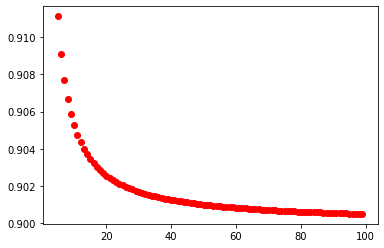

In [119]:
p = 1
m = 5
x0 = 1
v = range(5,100)
y = [ 1 - ((p/m) * (x- x0)/(2*x - x0)) for x in v]
plt.plot(v,y, 'ro')